<a href="https://colab.research.google.com/github/harshadsavle/store_sales_prediction/blob/main/Retail_Sales_Prediction_Harshad_Savle.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#<b> Project Title :- Sales Prediction : Predicting sales of a major store chain Rossmann</b>


---



## <b> Project Description </b>

### Rossmann operates over 3,000 drug stores in 7 European countries. Currently, Rossmann store managers are tasked with predicting their daily sales for up to six weeks in advance. Store sales are influenced by many factors, including promotions, competition, school and state holidays, seasonality, and locality. With thousands of individual managers predicting sales based on their unique circumstances, the accuracy of results can be quite varied.

### You are provided with historical sales data for 1,115 Rossmann stores. The task is to forecast the "Sales" column for the test set. Note that some stores in the dataset were temporarily closed for refurbishment.

## <b> Data Description </b>

### <b>Rossmann Stores Data.csv </b> - historical data including Sales
### <b>store.csv </b> - supplemental information about the stores


### <b><u>Data fields</u></b>
### Most of the fields are self-explanatory. The following are descriptions for those that aren't.

* #### Id - an Id that represents a (Store, Date) duple within the test set
* #### Store - a unique Id for each store
* #### Sales - the turnover for any given day (this is what you are predicting)
* #### Customers - the number of customers on a given day
* #### Open - an indicator for whether the store was open: 0 = closed, 1 = open
* #### StateHoliday - indicates a state holiday. Normally all stores, with few exceptions, are closed on state holidays. Note that all schools are closed on public holidays and weekends. a = public holiday, b = Easter holiday, c = Christmas, 0 = None
* #### SchoolHoliday - indicates if the (Store, Date) was affected by the closure of public schools
* #### StoreType - differentiates between 4 different store models: a, b, c, d
* #### Assortment - describes an assortment level: a = basic, b = extra, c = extended
* #### CompetitionDistance - distance in meters to the nearest competitor store
* #### CompetitionOpenSince[Month/Year] - gives the approximate year and month of the time the nearest competitor was opened
* #### Promo - indicates whether a store is running a promo on that day
* #### Promo2 - Promo2 is a continuing and consecutive promotion for some stores: 0 = store is not participating, 1 = store is participating
* #### Promo2Since[Year/Week] - describes the year and calendar week when the store started participating in Promo2
* #### PromoInterval - describes the consecutive intervals Promo2 is started, naming the months the promotion is started anew. E.g. "Feb,May,Aug,Nov" means each round starts in February, May, August, November of any given year for that store


#**Following are the 7 major steps of building Machine Learning Model** :
##1.   Collecting Data.
##2.   Preparing the Data
* ###  Exploratory Data Analysis.
* ###  Feature engineering.

##3.   Choosing a Model
##4.   Training the Model.
##5.   Evaluating the Model.
##6.   Parameter Tuning.
##7.   Making Predictions.

##**First thing first importing the necessary libraries for EDA and Machine learning algorithim to train our model.**

##*Following are the libraries:-**

1.   NumPy
2.   Pandas
3.   Matplotlib
4.   Seaborn
5.   Scikit Learn


In [5]:
# Importing Essential Libraries
import numpy as np
import pandas as pd
from pandas import datetime as dt
from pandas import Series,DataFrame
import datetime

# Importing Libraries For Data Visualization
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from scipy import stats
from scipy.stats import norm


# Importing Matrics
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from sklearn.metrics import r2_score


# Importing Libraries For ML Model
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge, Lasso
from sklearn.preprocessing import PolynomialFeatures
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
# from xgboost import XGBRegressor
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestRegressor


# Ignoring warnings
import warnings
warnings.filterwarnings('ignore')

###we are ready to mount the google drive using below code*



#**Step-1) Collecting Data**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


##*After mounting the gdrive we are ready to load our dataset.*
we have two dataset.which is Rossmann Store data and Store data.In which we have diffrent store observations and its some information like sales store catagories etc.


In [6]:
rossmann_df = pd.read_csv("/content/drive/MyDrive/capstone project 2/Rossmann Stores Data.csv")

store_df = pd.read_csv("/content/drive/MyDrive/capstone project 2/store.csv")

#**Step-2) Preparing The Data**

##*Let's Take First Look On Both Datasets*

In [7]:
rossmann_df.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [8]:
store_df.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


##**Now checking the shape of our DataFrames which helps to get an idea to know the number of rows and columns present in our both DataFrames.**

In [ ]:
rossmann_df.shape, store_df.shape

((1017209, 9), (1115, 10))

##The rossmann_df has 1017209  Rows and 9 Columns

## The store_df has 1115 Rows and 10 Columns

##**Using info() method we can easily get the idea of what kind of data type and null values inside our both dataframes we have.**

In [9]:
#checking the info 
store_df.info(),rossmann_df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Store                      1115 non-null   int64  
 1   StoreType                  1115 non-null   object 
 2   Assortment                 1115 non-null   object 
 3   CompetitionDistance        1112 non-null   float64
 4   CompetitionOpenSinceMonth  761 non-null    float64
 5   CompetitionOpenSinceYear   761 non-null    float64
 6   Promo2                     1115 non-null   int64  
 7   Promo2SinceWeek            571 non-null    float64
 8   Promo2SinceYear            571 non-null    float64
 9   PromoInterval              571 non-null    object 
dtypes: float64(5), int64(2), object(3)
memory usage: 87.2+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype 
-

(None, None)

##**as we can see that in our rossmann_df we have zero null values and in our store_df we have too many null values.**

###*geting the total sum of null values present in each columns in our `store_df` using `isnull()` function present in pandas library.*

In [10]:
#calculating totall null values in our store dataframe

store_df.isnull().sum()

Store                          0
StoreType                      0
Assortment                     0
CompetitionDistance            3
CompetitionOpenSinceMonth    354
CompetitionOpenSinceYear     354
Promo2                         0
Promo2SinceWeek              544
Promo2SinceYear              544
PromoInterval                544
dtype: int64

In [11]:
# Calculating null values percentages present in Data
store_df.isnull().mean().round(4) * 100

Store                         0.00
StoreType                     0.00
Assortment                    0.00
CompetitionDistance           0.27
CompetitionOpenSinceMonth    31.75
CompetitionOpenSinceYear     31.75
Promo2                        0.00
Promo2SinceWeek              48.79
Promo2SinceYear              48.79
PromoInterval                48.79
dtype: float64

###*we can see that we have 6 columns in which we have null values. so we have to find correct way to fill these null values.*

We can see that in 3 columns CompetitionDistance, CompetitionOpenSinceMonth, CompetitionOpenSinceYear having less percentage of nulls. So we will fill these values by mode and median as per column requirements.

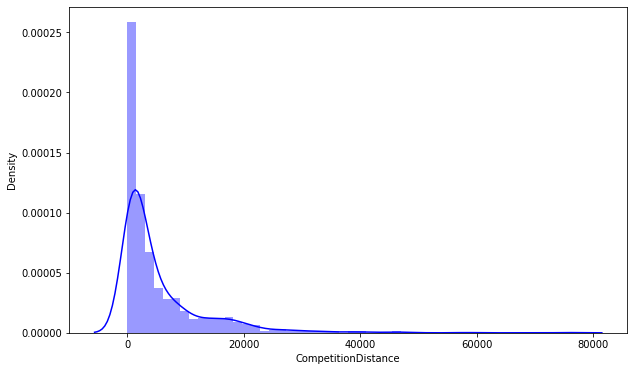

In [12]:
#checking the disribution of CompetitionDistance column
plt.figure(figsize=(10,6))
sns.distplot(store_df['CompetitionDistance'], color = 'b')
plt.show()

###*as we can see that the distribution look like right skewed distribution. so we dicided to fill null values with median*

In [13]:
store_df['CompetitionOpenSinceMonth'].fillna(store_df['CompetitionOpenSinceMonth'].mode()[0], inplace = True)

store_df['CompetitionDistance'].fillna(store_df['CompetitionDistance'].median(), inplace = True)

store_df['CompetitionOpenSinceYear'].fillna(store_df['CompetitionOpenSinceYear'].mode()[0], inplace = True)

We have simply filled these below 3 Columns by 0 

In [14]:
store_df['Promo2SinceWeek'].fillna(0, inplace = True)

store_df['Promo2SinceYear'].fillna(0, inplace = True)

store_df['PromoInterval'].fillna(0, inplace = True)

In [15]:
# Again Checking the Null Values

print(store_df.isnull().mean().round(4) * 100)

Store                        0.0
StoreType                    0.0
Assortment                   0.0
CompetitionDistance          0.0
CompetitionOpenSinceMonth    0.0
CompetitionOpenSinceYear     0.0
Promo2                       0.0
Promo2SinceWeek              0.0
Promo2SinceYear              0.0
PromoInterval                0.0
dtype: float64


###*As we can see that many columns having object datatype so we have to check the datatype of thses column because our machine learning algorithms only takes numberical values.*

###**first we have date column we have to separate the date, month and year from that.**

In [16]:
rossmann_df["Date"]=pd.to_datetime(rossmann_df["Date"])
rossmann_df["Year"]=rossmann_df["Date"].dt.year
rossmann_df["Month"]=rossmann_df["Date"].dt.month
rossmann_df["Day"]=rossmann_df["Date"].dt.day
rossmann_df["Week"]=rossmann_df["Date"].dt.week%4
rossmann_df["WeekOfYear"]=rossmann_df["Date"].dt.week

In [17]:
rossmann_df.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Year,Month,Day,Week,WeekOfYear
0,1,5,2015-07-31,5263,555,1,1,0,1,2015,7,31,3,31
1,2,5,2015-07-31,6064,625,1,1,0,1,2015,7,31,3,31
2,3,5,2015-07-31,8314,821,1,1,0,1,2015,7,31,3,31
3,4,5,2015-07-31,13995,1498,1,1,0,1,2015,7,31,3,31
4,5,5,2015-07-31,4822,559,1,1,0,1,2015,7,31,3,31


###**Let's Check the description of the data in the DataFrame**

In [18]:
rossmann_df.describe()

,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday,Year,Month,Day,Week,WeekOfYear
count,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06
mean,5.584297e+02,3.998341e+00,5.773819e+03,6.331459e+02,8.301067e-01,3.815145e-01,1.786467e-01,2.013832e+03,5.846762e+00,1.570279e+01,1.509300e+00,2.361551e+01
std,3.219087e+02,1.997391e+00,3.849926e+03,4.644117e+02,3.755392e-01,4.857586e-01,3.830564e-01,7.773960e-01,3.326097e+00,8.787638e+00,1.113273e+00,1.443338e+01
min,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.013000e+03,1.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00
25%,2.800000e+02,2.000000e+00,3.727000e+03,4.050000e+02,1.000000e+00,0.000000e+00,0.000000e+00,2.013000e+03,3.000000e+00,8.000000e+00,1.000000e+00,1.100000e+01
50%,5.580000e+02,4.000000e+00,5.744000e+03,6.090000e+02,1.000000e+00,0.000000e+00,0.000000e+00,2.014000e+03,6.000000e+00,1.600000e+01,2.000000e+00,2.200000e+01
75%,8.380000e+02,6.000000e+00,7.856000e+03,8.370000e+02,1.000000e+00,1.000000e+00,0.000000e+00,2.014000e+03,8.000000e+00,2.300000e+01,3.000000e+00,3.500000e+01
max,1.115000e+03,7.000000e+00,4.155100e+04,7.388000e+03,1.000000e+00,1.000000e+00,1.000000e+00,2.015000e+03,1.200000e+01,3.100000e+01,3.000000e+00,5.200000e+01


In [19]:
store_df.describe()

,Store,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear
count,1115.00000,1115.000000,1115.000000,1115.000000,1115.000000,1115.000000,1115.000000
mean,558.00000,5396.614350,7.788341,2010.043946,0.512108,12.083408,1030.239462
std,322.01708,7654.513635,2.779130,5.500844,0.500078,15.542241,1006.038782
min,1.00000,20.000000,1.000000,1900.000000,0.000000,0.000000,0.000000
25%,279.50000,720.000000,6.000000,2008.000000,0.000000,0.000000,0.000000
50%,558.00000,2325.000000,9.000000,2012.000000,1.000000,1.000000,2009.000000
75%,836.50000,6875.000000,9.000000,2013.000000,1.000000,22.000000,2012.000000
max,1115.00000,75860.000000,12.000000,2015.000000,1.000000,50.000000,2015.000000


## Let's Merge the Rossmann_df and Store_df by column 'Store' as in both csv Store column is common.

In [20]:
# Merging the Column

merge_df = pd.merge(rossmann_df, store_df, on = 'Store', how = 'outer')

merge_df.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Year,...,WeekOfYear,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,555,1,1,0,1,2015,...,31,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
1,1,4,2015-07-30,5020,546,1,1,0,1,2015,...,31,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
2,1,3,2015-07-29,4782,523,1,1,0,1,2015,...,31,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
3,1,2,2015-07-28,5011,560,1,1,0,1,2015,...,31,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
4,1,1,2015-07-27,6102,612,1,1,0,1,2015,...,31,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0


In [21]:
merge_df.shape

(1017209, 23)

##Now we have 1017209 numner of rows and 18 columns.

In [22]:
merge_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1017209 entries, 0 to 1017208
Data columns (total 23 columns):
 #   Column                     Non-Null Count    Dtype         
---  ------                     --------------    -----         
 0   Store                      1017209 non-null  int64         
 1   DayOfWeek                  1017209 non-null  int64         
 2   Date                       1017209 non-null  datetime64[ns]
 3   Sales                      1017209 non-null  int64         
 4   Customers                  1017209 non-null  int64         
 5   Open                       1017209 non-null  int64         
 6   Promo                      1017209 non-null  int64         
 7   StateHoliday               1017209 non-null  object        
 8   SchoolHoliday              1017209 non-null  int64         
 9   Year                       1017209 non-null  int64         
 10  Month                      1017209 non-null  int64         
 11  Day                        1017209 no

###*Making a copy of our processed dataset to prevent that if we mistakenly do some change via code like inplace = true.*

In [23]:
final_df = merge_df.copy()

In [24]:
final_df.drop(['Date'], axis = 1, inplace = True)

In [25]:
final_df['CompetitionOpen'] = 0
final_df['PromoOpen'] = 0

We Can identify that since when compition was open in number of years till current year

Same as well as for how many number of Promo2 are opened till date

In [26]:
final_df['CompetitionOpen'] = (final_df['CompetitionOpen'].where(final_df['CompetitionOpenSinceYear'] == 0, other= (12 * (final_df['Year'] - final_df['CompetitionOpenSinceYear'])) + (final_df['Month'] - final_df['CompetitionOpenSinceMonth'])))
final_df['PromoOpen'] = ( 12 * (final_df['Year'] - final_df['Promo2SinceYear'])) + final_df['Month'] - ((final_df['Promo2SinceWeek']/4))

In [27]:
final_df.head()

,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Year,Month,...,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,CompetitionOpen,PromoOpen
0,1,5,5263,555,1,1,0,1,2015,7,...,a,1270.0,9.0,2008.0,0,0.0,0.0,0,82,24187.0
1,1,4,5020,546,1,1,0,1,2015,7,...,a,1270.0,9.0,2008.0,0,0.0,0.0,0,82,24187.0
2,1,3,4782,523,1,1,0,1,2015,7,...,a,1270.0,9.0,2008.0,0,0.0,0.0,0,82,24187.0
3,1,2,5011,560,1,1,0,1,2015,7,...,a,1270.0,9.0,2008.0,0,0.0,0.0,0,82,24187.0
4,1,1,6102,612,1,1,0,1,2015,7,...,a,1270.0,9.0,2008.0,0,0.0,0.0,0,82,24187.0


We will check if PromoOpen got any Negative Values

In [28]:
final_df[final_df['PromoOpen']<0]

,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Year,Month,...,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,CompetitionOpen,PromoOpen
17926,20,1,9229,954,1,1,0,0,2014,6,...,a,2340.0,5.0,2009.0,1,40.0,2014.0,"Jan,Apr,Jul,Oct",61,-4.00
17927,20,7,0,0,0,0,0,0,2014,6,...,a,2340.0,5.0,2009.0,1,40.0,2014.0,"Jan,Apr,Jul,Oct",61,-4.00
17928,20,6,5572,566,1,0,0,0,2014,6,...,a,2340.0,5.0,2009.0,1,40.0,2014.0,"Jan,Apr,Jul,Oct",61,-4.00
17929,20,5,7149,839,1,0,0,0,2014,6,...,a,2340.0,5.0,2009.0,1,40.0,2014.0,"Jan,Apr,Jul,Oct",61,-4.00
17930,20,4,8118,997,1,0,0,0,2014,6,...,a,2340.0,5.0,2009.0,1,40.0,2014.0,"Jan,Apr,Jul,Oct",61,-4.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1013436,1111,6,3325,291,1,0,0,0,2013,1,...,a,1900.0,6.0,2014.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct",-17,-6.75
1013437,1111,5,4640,453,1,0,0,1,2013,1,...,a,1900.0,6.0,2014.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct",-17,-6.75
1013438,1111,4,4579,444,1,0,0,1,2013,1,...,a,1900.0,6.0,2014.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct",-17,-6.75
1013439,1111,3,5097,505,1,0,0,1,2013,1,...,a,1900.0,6.0,2014.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct",-17,-6.75


##*we can make these PromoOpen negative values to zeros, because they have not started the promos at that time*


In [29]:
final_df.loc[final_df['PromoOpen'] < 0, 'PromoOpen'] = 0

In [30]:
final_df[final_df['PromoOpen'] < 0]

,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Year,Month,...,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,CompetitionOpen,PromoOpen


##*we can also make these CompetitionOpen negative values to zeros, because they have not opened the competition at that time*


In [31]:
final_df.loc[final_df['CompetitionOpen']<0, 'CompetitionOpen'] = 0

In [32]:
final_df[final_df['CompetitionOpen'] < 0]

,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Year,Month,...,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,CompetitionOpen,PromoOpen


In [33]:
final_df.head()

,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Year,Month,...,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,CompetitionOpen,PromoOpen
0,1,5,5263,555,1,1,0,1,2015,7,...,a,1270.0,9.0,2008.0,0,0.0,0.0,0,82,24187.0
1,1,4,5020,546,1,1,0,1,2015,7,...,a,1270.0,9.0,2008.0,0,0.0,0.0,0,82,24187.0
2,1,3,4782,523,1,1,0,1,2015,7,...,a,1270.0,9.0,2008.0,0,0.0,0.0,0,82,24187.0
3,1,2,5011,560,1,1,0,1,2015,7,...,a,1270.0,9.0,2008.0,0,0.0,0.0,0,82,24187.0
4,1,1,6102,612,1,1,0,1,2015,7,...,a,1270.0,9.0,2008.0,0,0.0,0.0,0,82,24187.0


In [34]:
final_df['PromoOpen'].value_counts()

0.0        70285
24187.0    16864
24173.0    16864
24159.0    16864
24161.0    16864
           ...  
56.0          31
49.0          31
48.0          31
46.0          31
47.0          30
Name: PromoOpen, Length: 293, dtype: int64

In [35]:
final_df['PromoOpen'].max()

24187.0

In [36]:
final_df['PromoOpen'].min()

0.0

###*some negative and some huge values are there*
###*first I will convert the values to zero in PromoOpen which is having Promo2 = 0, because they have not started any promo so no open promo.*

In [37]:
final_df[final_df['Promo'] == 0]

,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Year,Month,...,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,CompetitionOpen,PromoOpen
5,1,7,0,0,0,0,0,0,2015,7,...,a,1270.0,9.0,2008.0,0,0.0,0.0,0,82,24187.0
6,1,6,4364,500,1,0,0,0,2015,7,...,a,1270.0,9.0,2008.0,0,0.0,0.0,0,82,24187.0
7,1,5,3706,459,1,0,0,0,2015,7,...,a,1270.0,9.0,2008.0,0,0.0,0.0,0,82,24187.0
8,1,4,3769,503,1,0,0,0,2015,7,...,a,1270.0,9.0,2008.0,0,0.0,0.0,0,82,24187.0
9,1,3,3464,463,1,0,0,0,2015,7,...,a,1270.0,9.0,2008.0,0,0.0,0.0,0,82,24187.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1017204,1115,6,4771,339,1,0,0,1,2013,1,...,c,5350.0,9.0,2013.0,1,22.0,2012.0,"Mar,Jun,Sept,Dec",0,7.5
1017205,1115,5,4540,326,1,0,0,1,2013,1,...,c,5350.0,9.0,2013.0,1,22.0,2012.0,"Mar,Jun,Sept,Dec",0,7.5
1017206,1115,4,4297,300,1,0,0,1,2013,1,...,c,5350.0,9.0,2013.0,1,22.0,2012.0,"Mar,Jun,Sept,Dec",0,7.5
1017207,1115,3,3697,305,1,0,0,1,2013,1,...,c,5350.0,9.0,2013.0,1,22.0,2012.0,"Mar,Jun,Sept,Dec",0,7.5


In [38]:
final_df.loc[final_df['Promo'] == 0, 'PromoOpen'] = 0

In [39]:
final_df[final_df['Promo'] == 0]

,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Year,Month,...,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,CompetitionOpen,PromoOpen
5,1,7,0,0,0,0,0,0,2015,7,...,a,1270.0,9.0,2008.0,0,0.0,0.0,0,82,0.0
6,1,6,4364,500,1,0,0,0,2015,7,...,a,1270.0,9.0,2008.0,0,0.0,0.0,0,82,0.0
7,1,5,3706,459,1,0,0,0,2015,7,...,a,1270.0,9.0,2008.0,0,0.0,0.0,0,82,0.0
8,1,4,3769,503,1,0,0,0,2015,7,...,a,1270.0,9.0,2008.0,0,0.0,0.0,0,82,0.0
9,1,3,3464,463,1,0,0,0,2015,7,...,a,1270.0,9.0,2008.0,0,0.0,0.0,0,82,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1017204,1115,6,4771,339,1,0,0,1,2013,1,...,c,5350.0,9.0,2013.0,1,22.0,2012.0,"Mar,Jun,Sept,Dec",0,0.0
1017205,1115,5,4540,326,1,0,0,1,2013,1,...,c,5350.0,9.0,2013.0,1,22.0,2012.0,"Mar,Jun,Sept,Dec",0,0.0
1017206,1115,4,4297,300,1,0,0,1,2013,1,...,c,5350.0,9.0,2013.0,1,22.0,2012.0,"Mar,Jun,Sept,Dec",0,0.0
1017207,1115,3,3697,305,1,0,0,1,2013,1,...,c,5350.0,9.0,2013.0,1,22.0,2012.0,"Mar,Jun,Sept,Dec",0,0.0


###*now we can remove the CompetitionOpenSinceMonth	CompetitionOpenSinceYear	Promo2	Promo2SinceWeek	Promo2SinceYear*

In [40]:
final_df.drop(['CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 'Promo2', 'Promo2SinceWeek', 'Promo2SinceYear'], axis = 1, inplace = True)

In [41]:
final_df.head()

,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Year,Month,Day,Week,WeekOfYear,StoreType,Assortment,CompetitionDistance,PromoInterval,CompetitionOpen,PromoOpen
0,1,5,5263,555,1,1,0,1,2015,7,31,3,31,c,a,1270.0,0,82,24187.0
1,1,4,5020,546,1,1,0,1,2015,7,30,3,31,c,a,1270.0,0,82,24187.0
2,1,3,4782,523,1,1,0,1,2015,7,29,3,31,c,a,1270.0,0,82,24187.0
3,1,2,5011,560,1,1,0,1,2015,7,28,3,31,c,a,1270.0,0,82,24187.0
4,1,1,6102,612,1,1,0,1,2015,7,27,3,31,c,a,1270.0,0,82,24187.0


In [42]:
final_df.shape

(1017209, 19)

In [43]:
#calculation value counts using value_counts() funtion
final_df['StateHoliday'].value_counts()

0    855087
0    131072
a     20260
b      6690
c      4100
Name: StateHoliday, dtype: int64

In [44]:
final_df.loc[final_df['StateHoliday'] == '0', 'StateHoliday'] = 0

final_df['StateHoliday'].value_counts()

0    986159
a     20260
b      6690
c      4100
Name: StateHoliday, dtype: int64

###*So as we have catagorical values in StateHoliday so we can do One Hot Encoding by using pandas pd.get_dummies to create dummy variables.*

In [45]:
final_df = pd.get_dummies(final_df, columns = ['StateHoliday'], drop_first = True)

###*Now in Assortment column we have to levelized the catagorical value in a form of 0,1,2 which it will give some weightage to model predictions.*

In [46]:
final_df['Assortment'].value_counts()

a    537445
c    471470
b      8294
Name: Assortment, dtype: int64

In [47]:
final_df['Assortment'] = np.where((final_df['Assortment'] == 'a'),0,final_df['Assortment'])

final_df['Assortment'] = np.where((final_df['Assortment'] == 'b'), 1, final_df['Assortment'])

final_df['Assortment'] = np.where((final_df['Assortment'] == 'c'), 2, final_df['Assortment'])

###Now in StoreType we did not use One hot encoding because if we done OHE encoding which give equal weightage to our model. so as per domain knowledge we can labeled as 0,1,2,3 as store type.


*   store_type 0 means small store_type.
*   store_type 1 means medium store_type.

*   store_type 2 means large store_type.
*   store_type 3 means huge store_type.

In [48]:
final_df['StoreType'].value_counts()

a    551627
d    312912
c    136840
b     15830
Name: StoreType, dtype: int64

In [49]:
#converting catagorical value into interger values based on store type class.

final_df['StoreType'] = np.where((final_df['StoreType'] == 'a'), 0, final_df['StoreType'])

final_df['StoreType'] = np.where((final_df['StoreType'] == 'b'), 1, final_df['StoreType'])

final_df['StoreType'] = np.where((final_df['StoreType'] == 'c'), 2, final_df['StoreType'])

final_df['StoreType'] = np.where((final_df['StoreType'] == 'd'), 3, final_df['StoreType'])

In [50]:
final_df.head()

,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday,Year,Month,Day,...,WeekOfYear,StoreType,Assortment,CompetitionDistance,PromoInterval,CompetitionOpen,PromoOpen,StateHoliday_a,StateHoliday_b,StateHoliday_c
0,1,5,5263,555,1,1,1,2015,7,31,...,31,2,0,1270.0,0,82,24187.0,0,0,0
1,1,4,5020,546,1,1,1,2015,7,30,...,31,2,0,1270.0,0,82,24187.0,0,0,0
2,1,3,4782,523,1,1,1,2015,7,29,...,31,2,0,1270.0,0,82,24187.0,0,0,0
3,1,2,5011,560,1,1,1,2015,7,28,...,31,2,0,1270.0,0,82,24187.0,0,0,0
4,1,1,6102,612,1,1,1,2015,7,27,...,31,2,0,1270.0,0,82,24187.0,0,0,0


In [51]:
final_df['PromoInterval'].value_counts

<bound method IndexOpsMixin.value_counts of 0                         0
1                         0
2                         0
3                         0
4                         0
                 ...       
1017204    Mar,Jun,Sept,Dec
1017205    Mar,Jun,Sept,Dec
1017206    Mar,Jun,Sept,Dec
1017207    Mar,Jun,Sept,Dec
1017208    Mar,Jun,Sept,Dec
Name: PromoInterval, Length: 1017209, dtype: object>

We can see above in PromoInterval column there are also some categorial values we need to give them One Hot Encoding

In [52]:
final_df = pd.get_dummies(final_df, columns = ['PromoInterval'], drop_first = True)

In [53]:
final_df.head()

,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday,Year,Month,Day,...,Assortment,CompetitionDistance,CompetitionOpen,PromoOpen,StateHoliday_a,StateHoliday_b,StateHoliday_c,"PromoInterval_Feb,May,Aug,Nov","PromoInterval_Jan,Apr,Jul,Oct","PromoInterval_Mar,Jun,Sept,Dec"
0,1,5,5263,555,1,1,1,2015,7,31,...,0,1270.0,82,24187.0,0,0,0,0,0,0
1,1,4,5020,546,1,1,1,2015,7,30,...,0,1270.0,82,24187.0,0,0,0,0,0,0
2,1,3,4782,523,1,1,1,2015,7,29,...,0,1270.0,82,24187.0,0,0,0,0,0,0
3,1,2,5011,560,1,1,1,2015,7,28,...,0,1270.0,82,24187.0,0,0,0,0,0,0
4,1,1,6102,612,1,1,1,2015,7,27,...,0,1270.0,82,24187.0,0,0,0,0,0,0


In [54]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1017209 entries, 0 to 1017208
Data columns (total 23 columns):
 #   Column                          Non-Null Count    Dtype  
---  ------                          --------------    -----  
 0   Store                           1017209 non-null  int64  
 1   DayOfWeek                       1017209 non-null  int64  
 2   Sales                           1017209 non-null  int64  
 3   Customers                       1017209 non-null  int64  
 4   Open                            1017209 non-null  int64  
 5   Promo                           1017209 non-null  int64  
 6   SchoolHoliday                   1017209 non-null  int64  
 7   Year                            1017209 non-null  int64  
 8   Month                           1017209 non-null  int64  
 9   Day                             1017209 non-null  int64  
 10  Week                            1017209 non-null  int64  
 11  WeekOfYear                      1017209 non-null  int64  
 12  

###As we can see that some of our features are in object datatype so we have to first convert into interger or float. so that our machine learning algorithm will understand these feature.

In [55]:
#converting object dtype to integer.

final_df['StoreType']= final_df['StoreType'].astype(int)

final_df['Assortment']= final_df['Assortment'].astype(int)

In [56]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1017209 entries, 0 to 1017208
Data columns (total 23 columns):
 #   Column                          Non-Null Count    Dtype  
---  ------                          --------------    -----  
 0   Store                           1017209 non-null  int64  
 1   DayOfWeek                       1017209 non-null  int64  
 2   Sales                           1017209 non-null  int64  
 3   Customers                       1017209 non-null  int64  
 4   Open                            1017209 non-null  int64  
 5   Promo                           1017209 non-null  int64  
 6   SchoolHoliday                   1017209 non-null  int64  
 7   Year                            1017209 non-null  int64  
 8   Month                           1017209 non-null  int64  
 9   Day                             1017209 non-null  int64  
 10  Week                            1017209 non-null  int64  
 11  WeekOfYear                      1017209 non-null  int64  
 12  

In [57]:
# Checking Duplicate Values
value=len(final_df[final_df.duplicated()])
print("The number of duplicate values in the data set is = ",value)

The number of duplicate values in the data set is =  0


#**EXPLORATORY DATA ANALYSIS**

---



In [58]:
final_df.head()

,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday,Year,Month,Day,...,Assortment,CompetitionDistance,CompetitionOpen,PromoOpen,StateHoliday_a,StateHoliday_b,StateHoliday_c,"PromoInterval_Feb,May,Aug,Nov","PromoInterval_Jan,Apr,Jul,Oct","PromoInterval_Mar,Jun,Sept,Dec"
0,1,5,5263,555,1,1,1,2015,7,31,...,0,1270.0,82,24187.0,0,0,0,0,0,0
1,1,4,5020,546,1,1,1,2015,7,30,...,0,1270.0,82,24187.0,0,0,0,0,0,0
2,1,3,4782,523,1,1,1,2015,7,29,...,0,1270.0,82,24187.0,0,0,0,0,0,0
3,1,2,5011,560,1,1,1,2015,7,28,...,0,1270.0,82,24187.0,0,0,0,0,0,0
4,1,1,6102,612,1,1,1,2015,7,27,...,0,1270.0,82,24187.0,0,0,0,0,0,0


In [59]:
final_df.columns

Index(['Store', 'DayOfWeek', 'Sales', 'Customers', 'Open', 'Promo',
       'SchoolHoliday', 'Year', 'Month', 'Day', 'Week', 'WeekOfYear',
       'StoreType', 'Assortment', 'CompetitionDistance', 'CompetitionOpen',
       'PromoOpen', 'StateHoliday_a', 'StateHoliday_b', 'StateHoliday_c',
       'PromoInterval_Feb,May,Aug,Nov', 'PromoInterval_Jan,Apr,Jul,Oct',
       'PromoInterval_Mar,Jun,Sept,Dec'],
      dtype='object')

### Here we Know that our Target Variable is `Sales` So will visualize it how it can help us out through.

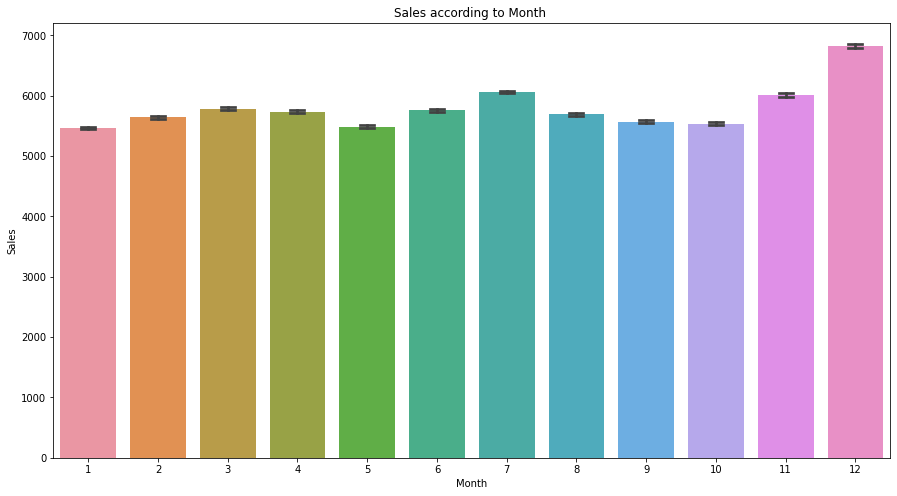

In [60]:
#anlysis of data by vizualisation
fig,ax=plt.subplots(figsize=(15,8))
sns.barplot(data=final_df,x='Month',y='Sales',ax=ax,capsize=.2)
ax.set(title='Sales according to Month ')
plt.show()

###In the above chart The sales in the month of December is high beacuse of winter holidays and Christmas festival and also new year so. Lots of stores start many offers on some products so people will more buy discounted items.

## Sales over week

Text(0.5, 1.0, 'Sales Over Weeks')

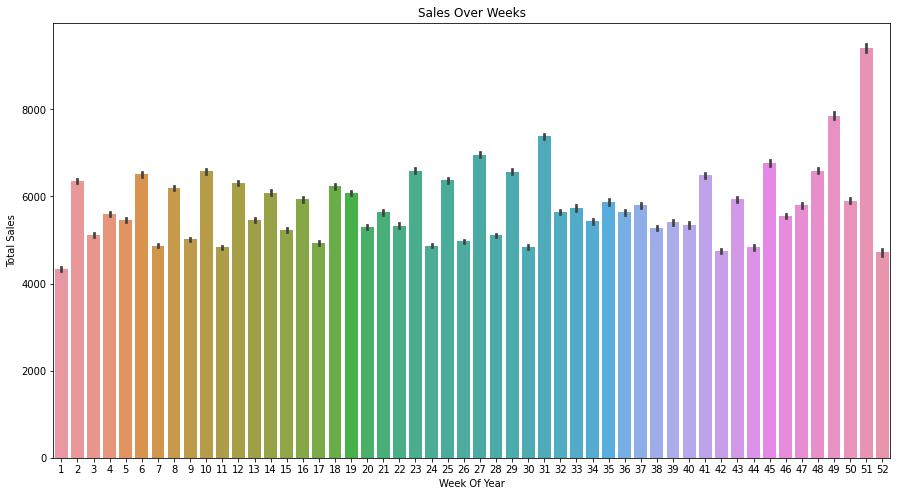

In [62]:
plt.figure(figsize=(15,8))
sns.barplot(x=final_df['WeekOfYear'],y=final_df['Sales'],data=final_df)
plt.xlabel('Week Of Year')
plt.ylabel('Total Sales')
plt.title('Sales Over Weeks')

Here we can see that in every year there week of 45 to 52 having with highest Sales. Because at the end of the year sales always gets High.

## Sales Distribution

In [63]:

# remove this part of data to avoid bias
final_df = final_df[final_df.Sales != 0]

In [64]:
{"Mean":np.mean(final_df.Sales),"Median":np.median(final_df.Sales)}


{'Mean': 6955.959133664481, 'Median': 6369.0}

Text(0.5, 1.0, 'Sales Distribution')

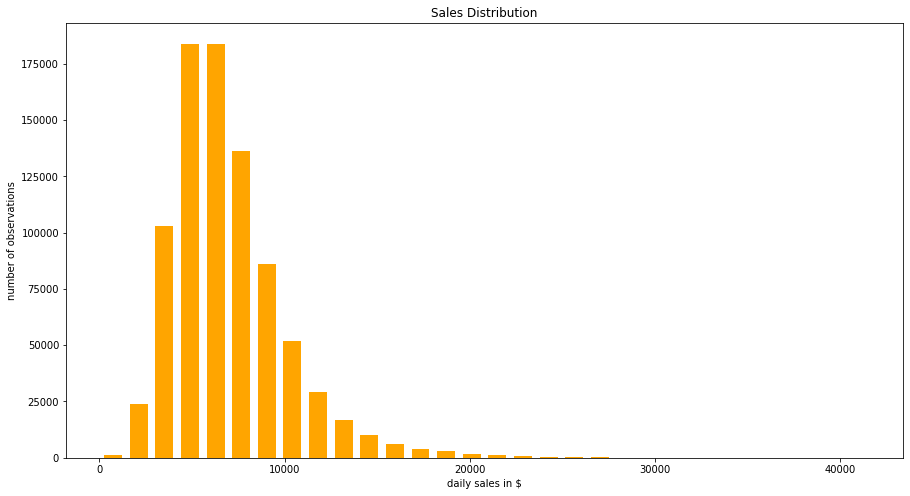

In [65]:

plt.figure(figsize=(15,8))
plt.hist(x=final_df.Sales, bins=30,color = "orange",rwidth=0.7)
plt.ylabel('number of observations')
plt.xlabel('daily sales in $')
plt.title('Sales Distribution')

###*The amount in dollars on daily basis based on sales and no of observations made*

## Customer Distribution

In [67]:
final_df['Year'].value_counts()

2013    337924
2014    310385
2015    196029
Name: Year, dtype: int64

In [68]:
{"Mean":np.mean(final_df.Customers),"Median":np.median(final_df.Customers)}

{'Mean': 762.777166253325, 'Median': 676.0}

Text(0.5, 1.0, 'Customer Distribution')

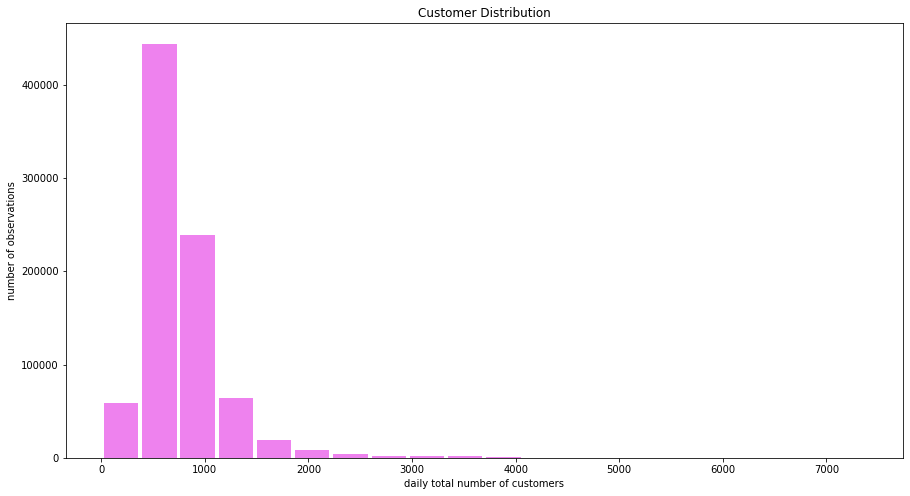

In [70]:

plt.figure(figsize=(15,8))

plt.hist(x=final_df.Customers , bins=20,color = "violet", rwidth=0.9)

plt.ylabel('number of observations')

plt.xlabel('daily total number of customers')

plt.title('Customer Distribution')


## Sales over a Years

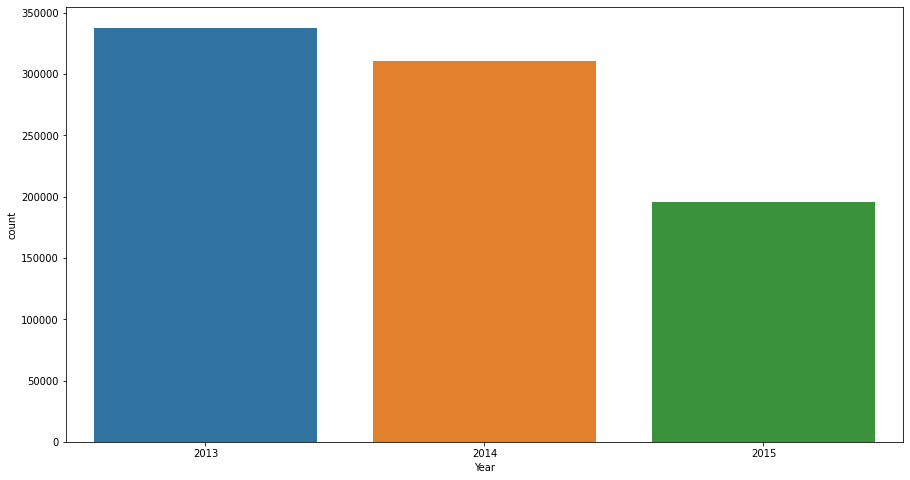

In [71]:
#anlysis of data by vizualisation
fig,ax=plt.subplots(figsize=(15,8))

sns.countplot(final_df['Year'], ax =ax)

###In this chart of sales according to years shows that in `2013` have the highest sales through out the year but in `2015` there is slightly low sales. 

## Sales by store type

Text(0.5, 1.0, 'Sales By Store Type')

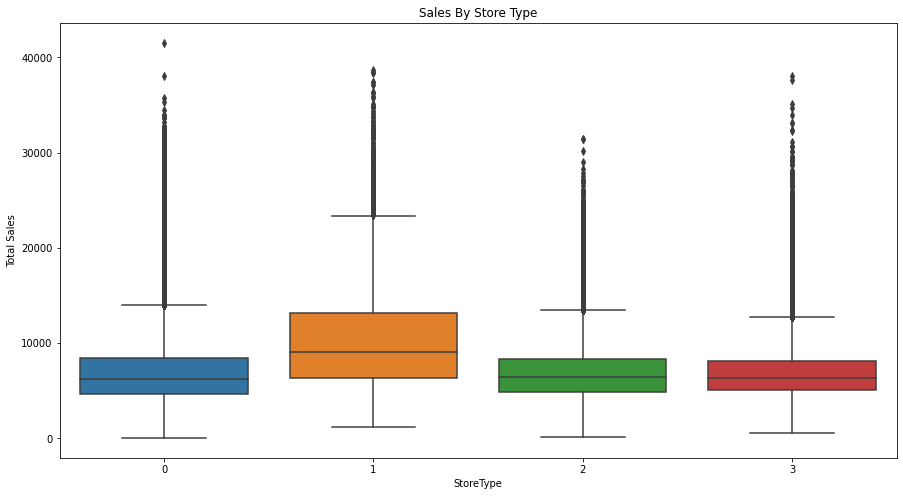

In [72]:
# StoreType - differentiates between 4 different store models: a, b, c, d
plt.figure(figsize=(15,8))
sns.boxplot(x=final_df.StoreType, y=final_df.Sales, data=final_df)
plt.ylabel('Total Sales')
plt.title('Sales By Store Type')


###In the above chart The sales in the store type 1 have higher sales as compare to other store catagory. the rest of store having almost same sales.

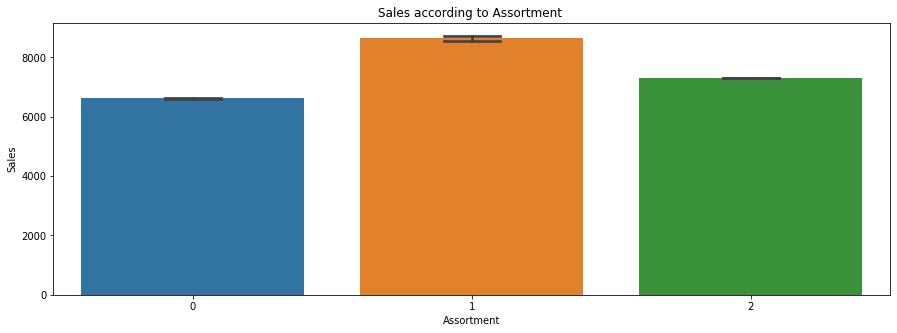

In [73]:
#anlysis of data by vizualisation
fig,ax=plt.subplots(figsize=(15,5))
sns.barplot(data=final_df,x='Assortment',y='Sales',ax=ax,capsize=.2)
ax.set(title='Sales according to Assortment ')
plt.show()

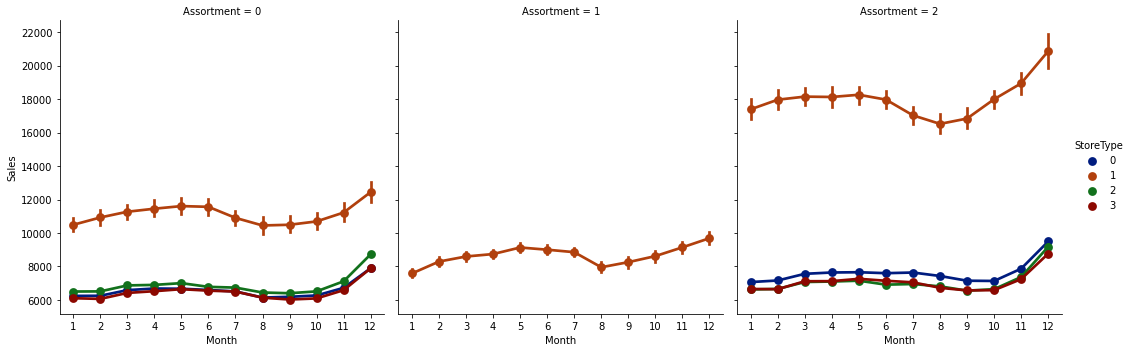

In [74]:
sns.factorplot(data = final_df, x = 'Month', y = "Sales", 
               col = 'Assortment',
               palette = 'dark',
               hue = 'StoreType')

### In the above chart The sales in which product assortment type 1 have higher sales as compare to other assortment catagory. the rest of assortment having almost same sales.

## Sales Over SchoolHoliday

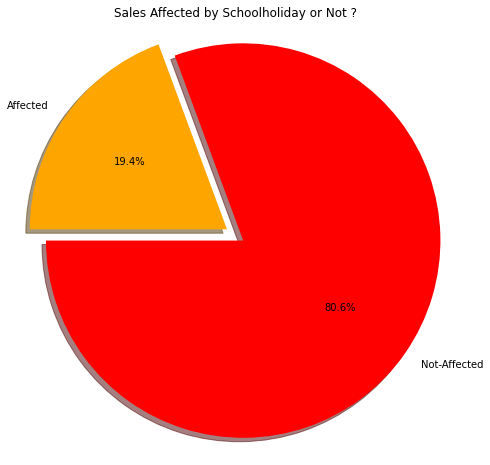

In [75]:
labels = 'Not-Affected' , 'Affected'
sizes = final_df.SchoolHoliday.value_counts()
colors = ['red', 'orange']
explode = (0.1, 0.0)
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=180)
plt.axis('equal')
plt.title("Sales Affected by Schoolholiday or Not ?")
plt.plot()
fig=plt.gcf()
fig.set_size_inches(8,8)
plt.show()

## Sale of Store over the Weekends

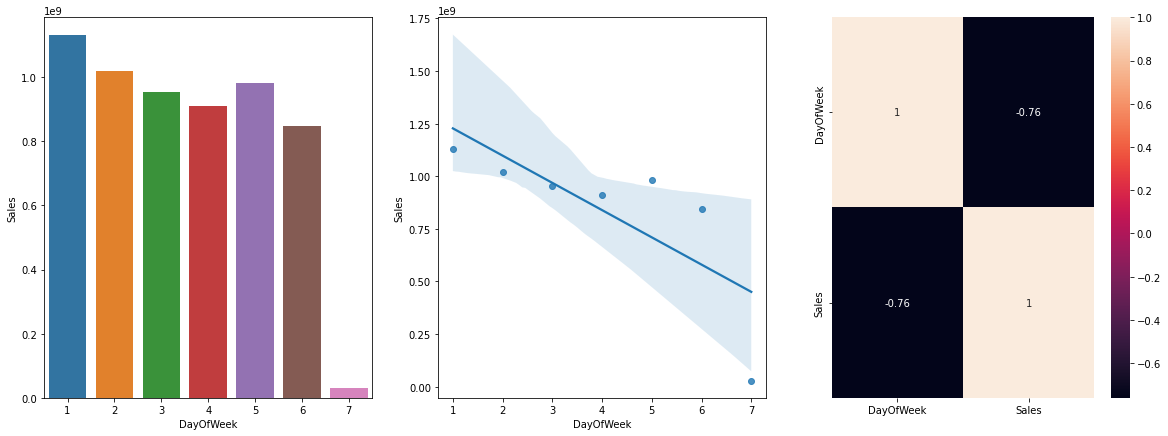

In [76]:
plt.figure(figsize=(20,7))
aux1 = final_df[['DayOfWeek','Sales']].groupby('DayOfWeek').sum().reset_index()

plt.subplot(1,3,1)
sns.barplot(x = 'DayOfWeek',y = 'Sales', data = aux1)

plt.subplot(1,3,2)
sns.regplot(x = 'DayOfWeek',y = 'Sales', data = aux1)

plt.subplot(1,3,3)
sns.heatmap(aux1.corr(method = 'pearson'), annot = True)

### Here We can See that Stores sell less on weekends.

##As we can see that our target variable 'Sales' look like normal distribution. 

###*Now check the distribution of our each features*

In [77]:

numeric_feature = ['Sales', 'Customers', 'CompetitionDistance','CompetitionOpen', 'PromoOpen','SchoolHoliday','StoreType','Assortment','Year']

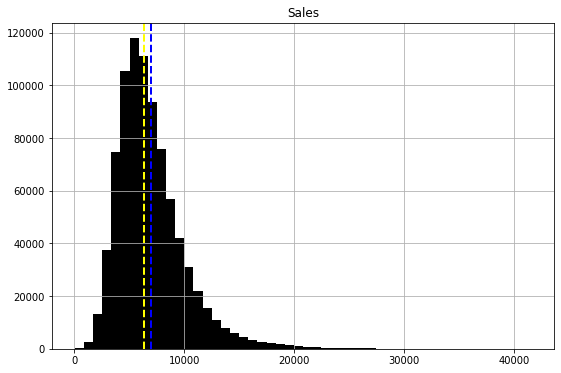

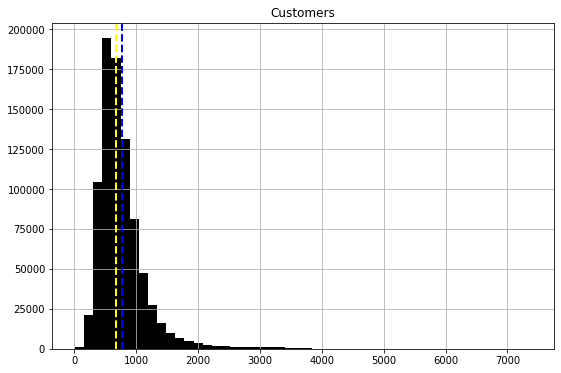

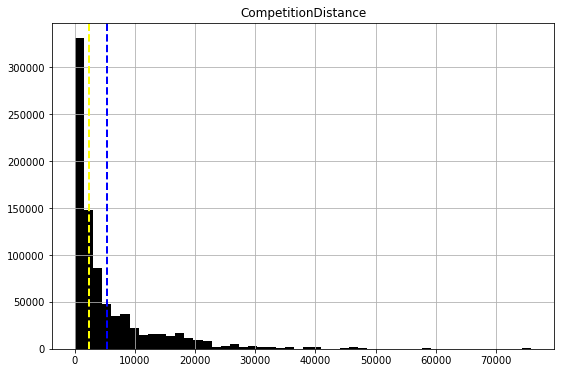

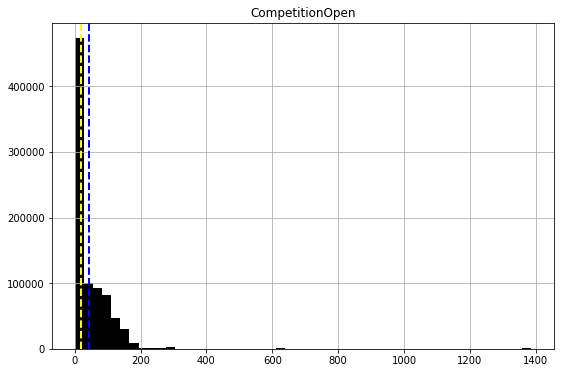

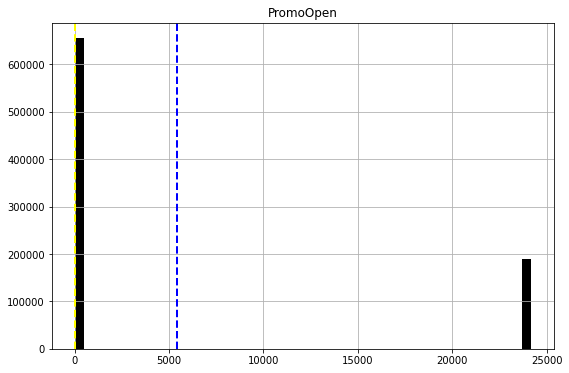

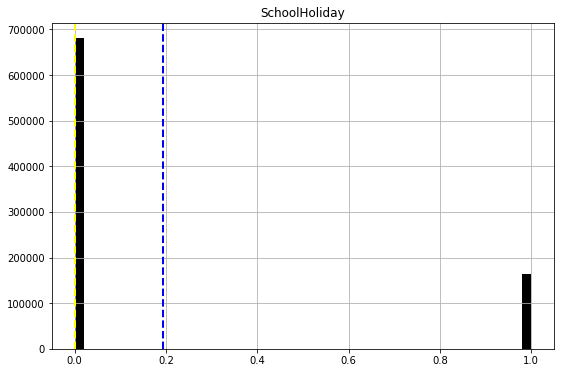

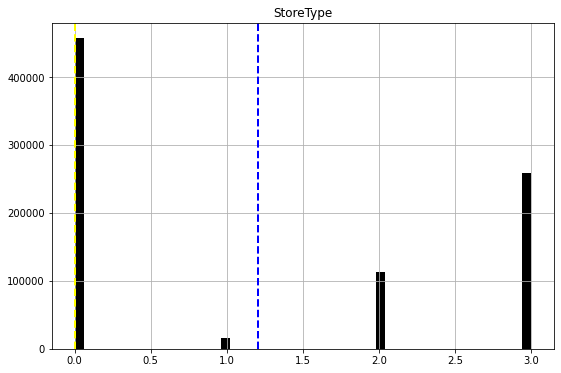

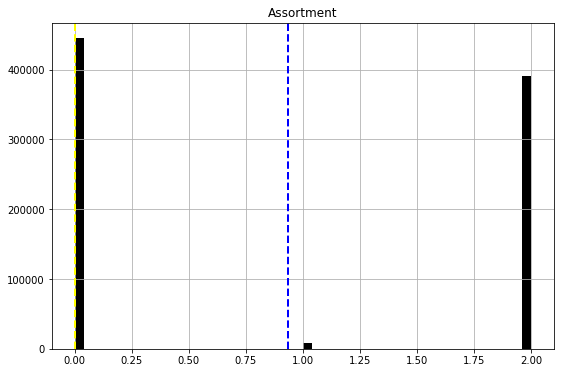

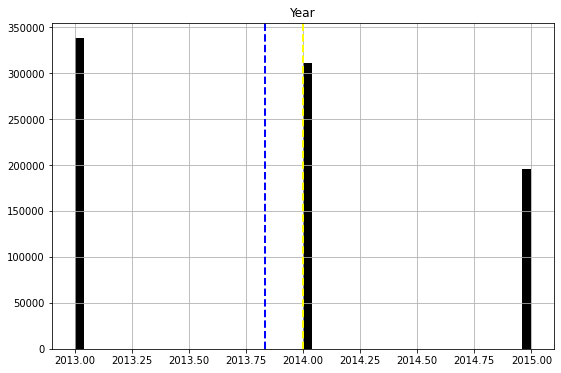

In [103]:
for col in numeric_feature:
  fig = plt.figure(figsize=(9, 6))
  ax = fig.gca()
  final_df[col].hist(bins=50, ax = ax, color = 'black')
  ax.axvline(final_df[col].mean(), color = 'blue',linestyle='dashed', linewidth=2)
  ax.axvline(final_df[col].median(), color = 'yellow',linestyle='dashed', linewidth=2)
  ax.set_title(col)

###In the above charts we see that many features has catogorical value so its more look like skewed chart and rest of the feature also not normaly distributed. So by using log1p transformation we are able to make our distribution more closer to look like normal distribution.


In [79]:
final_df['Sales_sqrt'] = final_df['Sales'].map(lambda x : np.sqrt(x) if x != 0 else 0)

final_df['Customer_ln'] = final_df['Customers'].map(lambda x : np.log(x) if x != 0 else 0)

final_df['CompetitionDistance_ln'] = final_df['CompetitionDistance'].map(lambda x : np.log(x) if x != 0 else 0)

final_df['CompetitionOpen_ln'] = final_df['CompetitionOpen'].map(lambda x : np.log(x) if x != 0 else 0)

final_df['PromoOpen_ln'] = final_df['PromoOpen'].map(lambda x : np.log(x) if x != 0 else 0)

final_df['SchoolHoliday_ln'] = final_df['SchoolHoliday'].map(lambda x : np.log(x) if x != 0 else 0)

final_df['StoreType_ln'] = final_df['StoreType'].map(lambda x : np.log(x) if x != 0 else 0)

final_df['Assortment_ln'] = final_df['Assortment'].map(lambda x : np.log(x) if x != 0 else 0)

final_df['Year_ln'] = final_df['Year'].map(lambda x : np.log(x) if x != 0 else 0)


In [80]:
numeric_feature_ln = ['Sales_sqrt', 'Customer_ln', 'CompetitionDistance_ln','CompetitionOpen_ln', 'PromoOpen_ln','SchoolHoliday_ln','StoreType_ln','Assortment_ln','Year_ln']

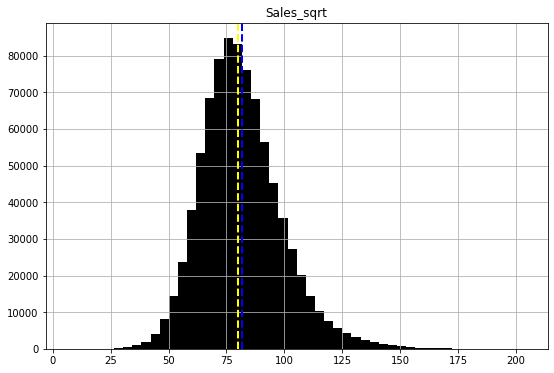

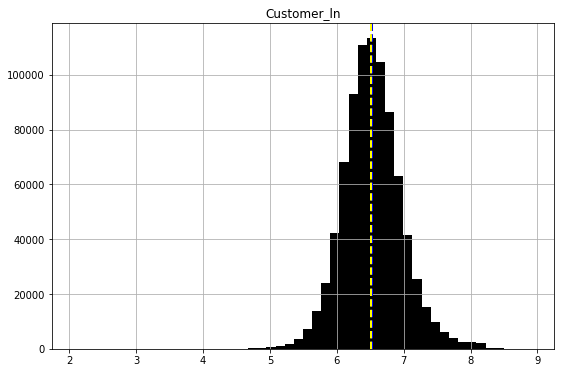

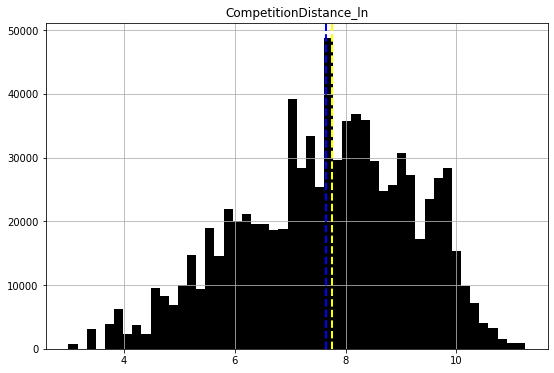

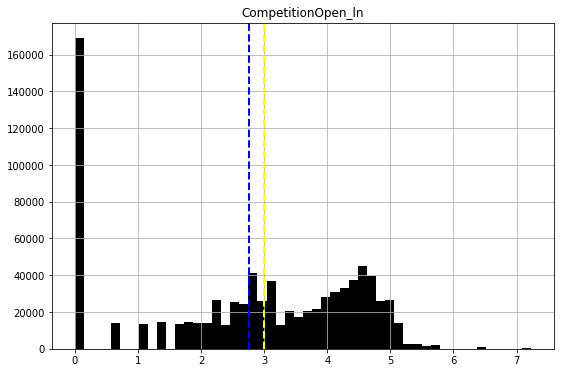

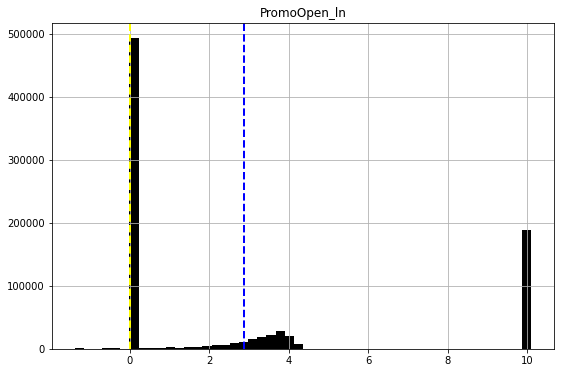

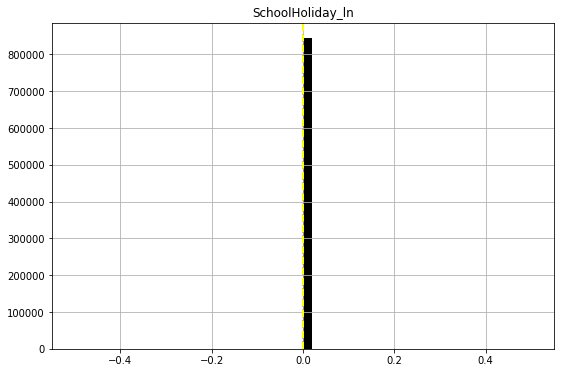

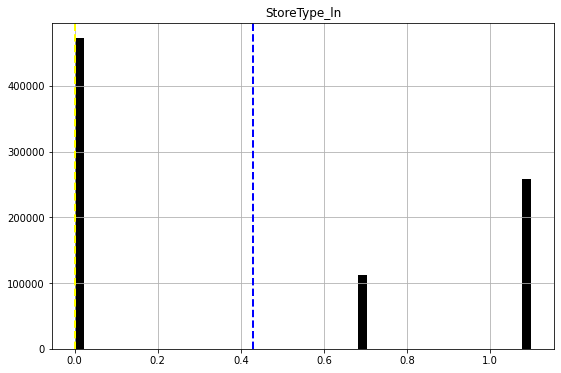

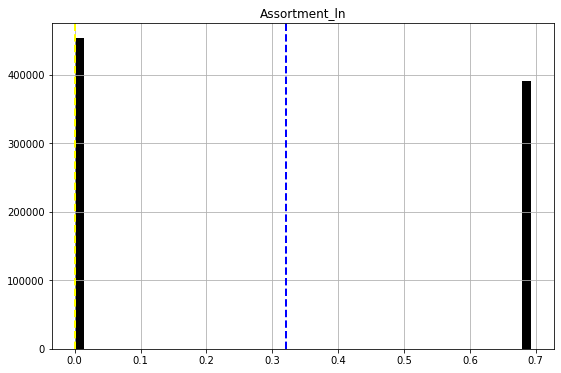

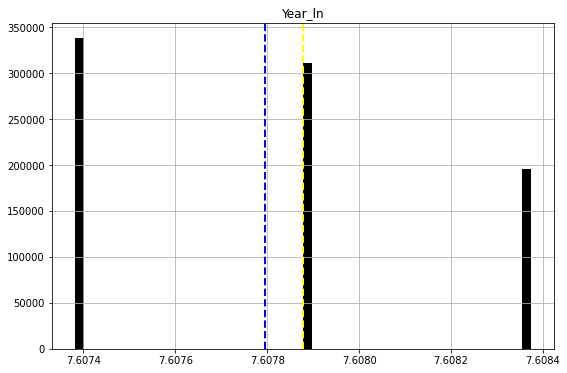

In [104]:
for col in numeric_feature_ln:
  fig = plt.figure(figsize=(9, 6))
  ax = fig.gca()
  final_df[col].hist(bins=50, ax = ax,color = 'black')
  ax.axvline(final_df[col].mean(), color = 'blue',linestyle='dashed', linewidth=2)
  ax.axvline(final_df[col].median(), color = 'yellow',linestyle='dashed', linewidth=2)
  ax.set_title(col)

###now we can see that some of our features like CompititionDistance now more look like normal distribution. rest of our feature still not normaly distributed some of feature has multi mode. beacuse of some features have catagorical values like 1,0.

In [83]:
corr_df = final_df.copy()
corr_df.head()

,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday,Year,Month,Day,...,"PromoInterval_Mar,Jun,Sept,Dec",Sales_sqrt,Customer_ln,CompetitionDistance_ln,CompetitionOpen_ln,PromoOpen_ln,SchoolHoliday_ln,StoreType_ln,Assortment_ln,Year_ln
0,1,5,5263,555,1,1,1,2015,7,31,...,0,72.546537,6.318968,7.146772,4.406719,10.093571,0.0,0.693147,0.0,7.608374
1,1,4,5020,546,1,1,1,2015,7,30,...,0,70.851958,6.302619,7.146772,4.406719,10.093571,0.0,0.693147,0.0,7.608374
2,1,3,4782,523,1,1,1,2015,7,29,...,0,69.152006,6.259581,7.146772,4.406719,10.093571,0.0,0.693147,0.0,7.608374
3,1,2,5011,560,1,1,1,2015,7,28,...,0,70.788417,6.327937,7.146772,4.406719,10.093571,0.0,0.693147,0.0,7.608374
4,1,1,6102,612,1,1,1,2015,7,27,...,0,78.115299,6.416732,7.146772,4.406719,10.093571,0.0,0.693147,0.0,7.608374


In [84]:
corr_df.columns

Index(['Store', 'DayOfWeek', 'Sales', 'Customers', 'Open', 'Promo',
       'SchoolHoliday', 'Year', 'Month', 'Day', 'Week', 'WeekOfYear',
       'StoreType', 'Assortment', 'CompetitionDistance', 'CompetitionOpen',
       'PromoOpen', 'StateHoliday_a', 'StateHoliday_b', 'StateHoliday_c',
       'PromoInterval_Feb,May,Aug,Nov', 'PromoInterval_Jan,Apr,Jul,Oct',
       'PromoInterval_Mar,Jun,Sept,Dec', 'Sales_sqrt', 'Customer_ln',
       'CompetitionDistance_ln', 'CompetitionOpen_ln', 'PromoOpen_ln',
       'SchoolHoliday_ln', 'StoreType_ln', 'Assortment_ln', 'Year_ln'],
      dtype='object')

In [85]:
corr_df.drop(['PromoInterval_Feb,May,Aug,Nov', 'PromoInterval_Jan,Apr,Jul,Oct',
       'PromoInterval_Mar,Jun,Sept,Dec', 'Sales_sqrt', 'Customer_ln',
       'CompetitionDistance_ln', 'CompetitionOpen_ln', 'PromoOpen_ln',
       'SchoolHoliday_ln', 'StoreType_ln', 'Assortment_ln', 'Year_ln','Open'], axis = 1, inplace = True)

## Checking Multicollinearity

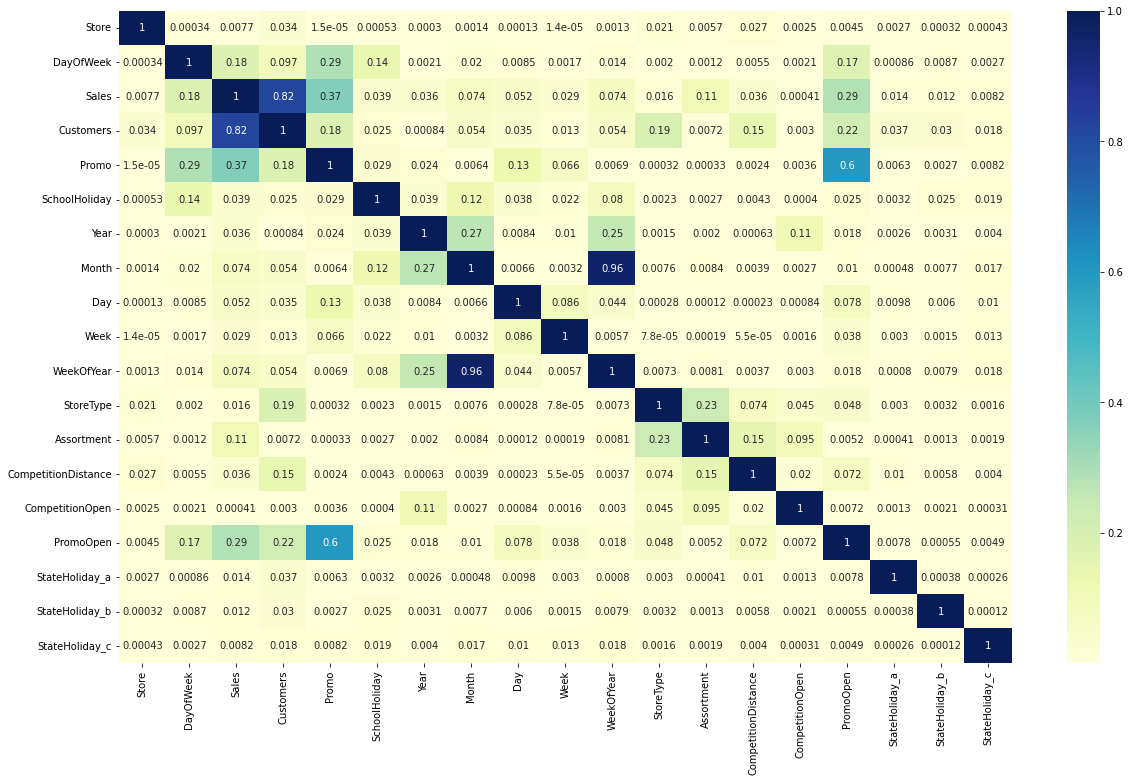

In [105]:
## Correlation heatmap
plt.figure(figsize=(20,12))
correlation = corr_df.corr()
sns.heatmap(abs(correlation), annot=True, cmap='YlGnBu')
plt.show()

**We didn't find any strong correlation between independant variables but we found some correlation with our dependent feature which is a good sign for our model.**


## Key Findings From EDA


---


* Store Model 'a'have the maximum number of sales and store counts followed by 'd' while Store Model 'b' have the least number of sales and store counts.

* Store model 'b' have least number of store counts and sales still performs quite well on average sales and customers compared to other store models.

* Basic Assortment level have the maximum number of sales and store counts followed by Extended level while Extra Assortment have the least number of sales and store counts

* Assortment level 'b' with least store counts and sales have perform quite well compared to 'a'. While there is an another surprising fact that assortment level 'c' have maximum number of sales with the least number of customers.

* Store Model "b" have the maximum number of sales at all assortment level and surprisingly Assortment Level "b" is only available in Store Level "b".

* There is a linear relationship between customer and sales and it is also noticeable that whenever promo was open, the store has higher sales and customer compared to the period when promo was closed, which means promo had good impact on the sales.

*  Sales are maximum on Mondays while sales are completely zero on Sundays because it seems like store use to remain closed on Sundays.

*  Mostly competitor stores weren't that far and the stores were densely located near each other and also sales were higher when competition was nearer.

* Sales are highest on 30th followed by 2nd and 4th date of every month while sales are lowest on the 1st date of every month followed by 25th and 26th date.

* Sales and Customers are at peak during November and December due to festive season like Christmas while sales are at lowest during January and May or we may say these months to be off season.

*  Promo had been provided to the customers throughout the weekdays reason why sales were also high but sales on weekends were very low as promo weren't provided to the customers.

* During public holidays store made more sales compared to Easter and Christmas holidays.

* Around 17.8% of the sales gets affected by the school holidays which also means that almost 17% of the sales are oriented from the school students.



## Now Let's Check Multicollinearity

In [87]:
def vif_cal(x):
  vif = pd.DataFrame()
  vif["variables"] = x.columns
  vif["VIF"] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]
  return (vif)

In [88]:
from patsy import dmatrices
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_cal(corr_df[[i for i in corr_df.describe().columns if i not in ['Store', 'Sales']]])

,variables,VIF
0,DayOfWeek,5.771702
1,Customers,5.258131
2,Promo,3.056977
3,SchoolHoliday,1.309325
4,Year,24.573065
5,Month,57.084453
6,Day,4.614663
7,Week,2.901931
8,WeekOfYear,51.287325
9,StoreType,1.968832


###The Multicollinearity of Year, Month and WeekOfYear are very high so we decided to drop those column for our linear Regression model.
###Because the the multicollinearity of each independeble feature should be under 10

In [89]:
corr_df.shape

(844338, 19)

In [90]:
final_df1 = corr_df.copy()

##Creating the X, y values for our algorithm.

In [91]:
# defining dependent variable
dep_var = 'Sales'

# defining independent variable
indep_var = final_df1.columns.drop(['Store','Sales'])

#Creating the X,y values for our algorithm.

In [92]:
# Create the data of independent variables
X = final_df1[indep_var].values

# Create the dependent variable data
y = final_df1[dep_var].values

In [93]:
final_df1.head()

,Store,DayOfWeek,Sales,Customers,Promo,SchoolHoliday,Year,Month,Day,Week,WeekOfYear,StoreType,Assortment,CompetitionDistance,CompetitionOpen,PromoOpen,StateHoliday_a,StateHoliday_b,StateHoliday_c
0,1,5,5263,555,1,1,2015,7,31,3,31,2,0,1270.0,82,24187.0,0,0,0
1,1,4,5020,546,1,1,2015,7,30,3,31,2,0,1270.0,82,24187.0,0,0,0
2,1,3,4782,523,1,1,2015,7,29,3,31,2,0,1270.0,82,24187.0,0,0,0
3,1,2,5011,560,1,1,2015,7,28,3,31,2,0,1270.0,82,24187.0,0,0,0
4,1,1,6102,612,1,1,2015,7,27,3,31,2,0,1270.0,82,24187.0,0,0,0


###Before, fitting any model it is a rule of thumb to split the dataset into a training and test set. This means some proportions of the data will go into training the model and some portion will be used to evaluate how our model is performing on any unseen data. The proportions may vary from 60:40, 70:30, 75:25 depending on the person but mostly used is 80:20 for training and testing respectively. In this step we will split our data into training and testing set using scikit learn library.

In [94]:
# Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 48)

In [95]:
print(X_train.shape)

print(X_test.shape)

(675470, 17)
(168868, 17)


In [96]:
# Transforming data
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

#**Machine Learning Model**

##**1. Linear Regression**

In [97]:
# Fitting the data into Linear Regression Model
reg = LinearRegression()
reg.fit(X_train,y_train)

LinearRegression()

In [98]:
# Model Prediction
y_pred = reg.predict(X_test)
r2_score(y_pred,y_test)

0.6880542568431705

In [99]:
# Storing Mean Of Dependant Variable
sales_mean=final_df1["Sales"].mean()

In [100]:
#Mean Absolute Error or MAE
MAE = round(mean_absolute_error(y_test,y_pred),6)
print("MAE :" , MAE)

# Mean Squared Error or MSE
MSE  = round(mean_squared_error(y_test, y_pred),6)
print("MSE :" , MSE)

# Root Mean Squared Error or RMSE
RMSE = round(np.sqrt(MSE),6)
print("RMSE :" ,RMSE)

# Root Mean Squared Error or RMSE
RMPSE = round((RMSE/sales_mean),6)
print("RMPSE :",RMPSE)

# R2
r2 = round(r2_score(y_test, y_pred),6)
print("R2 :" ,r2)

# Adjusted_r
Adjusted_r2 = round(1 - (1-r2_score(y_test, y_pred)) * (len(y_test)-1)/(len(y_test)-X_test.shape[1]-1),6)
print("Adjusted R2 :" , Adjusted_r2)

MAE : 1047.74523
MSE : 2275750.827228
RMSE : 1508.559189
RMPSE : 0.216873
R2 : 0.762571
Adjusted R2 : 0.762547


###**CROSS VALIDATION**



As you know in KNN method we use train test split with random_state that split exactly same at each time. However, if we do not use random_state, data is split differently at each time and according to split accuracy will be different. Therefore, we can conclude that model performance is dependent on train_test_split. For example you split, fit and predict data 5 times and accuracies are 0.89, 0.9, 0.91, 0.92 and 0.93, respectively. Which accuracy do you use? Do you know what accuracy will be at 6th times split, train and predict. The answer is I do not know but if I use cross validation I can find acceptable accuracy.

Cross Validation (CV)


* When K is increase, computationally cost is increase

* K folds = K fold CV.

* cross_val_score(LR_model,x,y,cv=5): use reg(linear regression) with x and y that we define at above and K is 5. It means 5 times(split, train,predict)

In [101]:
# Importing 
from sklearn.model_selection import cross_val_score

# Cross validation
k = 5
cv_result = cross_val_score(reg,X,y,cv=k) # uses R^2 as score 
print('CV Scores: ',cv_result)
print('CV scores average: ',np.sum(cv_result)/k)

CV Scores:  [0.77332459 0.78638011 0.81299321 0.6837669  0.73120157]
CV scores average:  0.757533275623083


**Regularized Regression with Hyper parameter Tunning.**

As we learn linear regression choose parameters (coefficients) while minimizing lost function. If linear regression thinks that one of the feature is important, it gives high coefficient to this feature. However, this can cause overfitting that is like memorizing in KNN. In order to avoid overfitting, we use regularization that penalize large coefficients.

**Ridge regression**: First regularization technique. Also it is called L2 regularization.

**Ridge regression lost fuction** = OLS + alpha * sum(parameter^2)
alpha is parameter we need to choose to fit and predict. alpha is hyperparameter that we need to choose for best accuracy and model complexity. This process is called **hyperparameter tuning.**

**What if alpha is zero? lost function**= OLS so that is linear rigression
If alpha is small that can cause overfitting
If alpha is big that can cause underfitting.
Lasso regression: Second regularization technique. Also it is called L1 regularization.

**Lasso regression lost fuction**= OLS + alpha * sum(absolute_value(parameter))
It can be used to select important features od the data. Because features whose values are not shrinked to zero, is chosen by lasso regression

## **2. Lasso Regression**

**Lasso regression** is a regularization technique. It is used over regression methods for a more accurate prediction. This model uses shrinkage. Shrinkage is where data values are shrunk towards a central point as the mean. The lasso procedure encourages simple, sparse models (i.e. models with fewer parameters). This particular type of regression is well-suited for models showing high levels of multicollinearity or when you want to automate certain parts of model selection, like variable selection/parameter elimination.

In [ ]:
# Model Training
lass = Lasso(alpha = 1.0, max_iter = 2000)
lass.fit(X_train,y_train)

Lasso(max_iter=2000)

In [ ]:
# Model Prediction
prediction_lasso = lass.predict(X_test)
r2_score(prediction_lasso,y_test)

0.6876388248063005

In [ ]:
#Mean Absolute Error or MAE
MAE = round(mean_absolute_error(y_test, prediction_lasso),6)
print("MAE :" , MAE)

# Mean Squared Error or MSE
MSE  = round(mean_squared_error(y_test, prediction_lasso),6)
print("MSE :" , MSE)

# Root Mean Squared Error or RMSE
RMSE = round(np.sqrt(MSE),6)
print("RMSE :" ,RMSE)

# Root Mean Squared Error or RMSE
RMPSE = round((RMSE/sales_mean),6)
print("RMPSE :",RMPSE)

# R2
r2 = round(r2_score(y_test, prediction_lasso),6)
print("R2 :" ,r2)

# Adjusted_r
Adjusted_r2 = round(1 - (1-r2_score(y_test, prediction_lasso)) * (len(y_test)-1)/(len(y_test)-X_test.shape[1]-1),6)
print("Adjusted R2 :" , Adjusted_r2)

MAE : 1047.81137
MSE : 2275823.1172
RMSE : 1508.583149
RMPSE : 0.216876
R2 : 0.762563
Adjusted R2 : 0.762539


## **3. Ridge Regression**

**Ridge regression** is a model tuning method that is used to analyse any data that suffers from multicollinearity. This method performs L2 regularization. When the issue of multicollinearity occurs, least-squares are unbiased, and variances are large, this results in predicted values being far away from the actual values.

In [ ]:
# Model Training
ridge = Ridge(alpha = 0.5, fit_intercept = True,random_state=0)
ridge.fit(X_train, y_train)

Ridge(alpha=0.5, random_state=0)

In [ ]:
# Model Prediction
pred_ridge =ridge.predict(X_test)
r2_score(pred_ridge, y_test)

0.6880537967350555

In [ ]:
#Mean Absolute Error or MAE
MAE = round(mean_absolute_error(y_test, pred_ridge),6)
print("MAE :" , MAE)

# Mean Squared Error or MSE
MSE  = round(mean_squared_error(y_test, pred_ridge),6)
print("MSE :" , MSE)

# Root Mean Squared Error or RMSE
RMSE = round(np.sqrt(MSE),6)
print("RMSE :" ,RMSE)

# Root Mean Squared Error or RMSE
RMPSE = round((RMSE/sales_mean),6)
print("RMPSE :",RMPSE)

# R2
r2 = round(r2_score(y_test, pred_ridge),6)
print("R2 :" ,r2)

# Adjusted_r
Adjusted_r2 = round(1 - (1-r2_score(y_test, pred_ridge)) * (len(y_test)-1)/(len(y_test)-X_test.shape[1]-1),6)
print("Adjusted R2 :" , Adjusted_r2)

MAE : 1047.74544
MSE : 2275750.839352
RMSE : 1508.559193
RMPSE : 0.216873
R2 : 0.762571
Adjusted R2 : 0.762547


## **4. Decision Tree Regression**

**Decision tree** builds regression or classification models in the form of a tree structure. It breaks down a dataset into smaller and smaller subsets while at the same time an associated decision tree is incrementally developed. The final result is a tree with decision nodes and leaf nodes. A decision node (e.g., Outlook) has two or more branches (e.g., Sunny, Overcast and Rainy), each representing values for the attribute tested. Leaf node (e.g., Hours Played) represents a decision on the numerical target. The topmost decision node in a tree which corresponds to the best predictor called root node. Decision trees can handle both categorical and numerical data.

In [ ]:
# Model Training
des_regressor = DecisionTreeRegressor(random_state=0)
des_regressor.fit(X_train,y_train)

DecisionTreeRegressor(random_state=0)

In [ ]:
# Model Prediction
y_pred_des = des_regressor.predict(X_test)
r2_score(y_pred_des, y_test)

0.9376665512835598

In [ ]:
#Mean Absolute Error or MAE
MAE = round(mean_absolute_error(y_test, y_pred_des),6)
print("MAE :" , MAE)

# Mean Squared Error or MSE
MSE  = round(mean_squared_error(y_test, y_pred_des),6)
print("MSE :" , MSE)

# Root Mean Squared Error or RMSE
RMSE = round(np.sqrt(MSE),6)
print("RMSE :" ,RMSE)

# Root Mean Squared Error or RMSE
RMPSE = round((RMSE/sales_mean),6)
print("RMPSE :",RMPSE)

# R2
r2 = round(r2_score(y_test, y_pred_des),6)
print("R2 :" ,r2)

# Adjusted_r
Adjusted_r2 = round(1 - (1-r2_score(y_test, y_pred_des)) * (len(y_test)-1)/(len(y_test)-X_test.shape[1]-1),6)
print("Adjusted R2 :" , Adjusted_r2)

MAE : 495.794405
MSE : 596493.291608
RMSE : 772.329782
RMPSE : 0.111031
R2 : 0.937768
Adjusted R2 : 0.937762


## **5. Random Forest Regression**

**Random Forest Regression** is a supervised learning algorithm that uses ensemble learning method for regression. Ensemble learning method is a technique that combines predictions from multiple machine learning algorithms to make a more accurate prediction than a single model. Random Forest is an ensemble technique capable of performing both regression and classification tasks with the use of multiple decision trees and a technique called Bootstrap and Aggregation, commonly known as bagging. The basic idea behind this is to combine multiple decision trees in determining the final output rather than relying on individual decision trees. 
Random Forest has multiple decision trees as base learning models. We randomly perform row sampling and feature sampling from the dataset forming sample datasets for every model. This part is called Bootstrap.

In [ ]:
# Model Training And Prediction

random_forest=RandomForestRegressor(n_estimators =300,max_depth=8)
random_forest.fit(X_train, y_train)
v_pred_rf=random_forest.predict(X_test)

In [ ]:
#Mean Absolute Error or MAE
MAE = round(mean_absolute_error(y_test, v_pred_rf),6)
print("MAE :" , MAE)

# Mean Squared Error or MSE
MSE  = round(mean_squared_error(y_test, v_pred_rf),6)
print("MSE :" , MSE)

# Root Mean Squared Error or RMSE
RMSE = round(np.sqrt(MSE),6)
print("RMSE :" ,RMSE)

# Root Mean Squared Error or RMSE
RMPSE = round((RMSE/sales_mean),6)
print("RMPSE :",RMPSE)

# R2
r2 = round(r2_score(y_test, v_pred_rf),6)
print("R2 :" ,r2)

# Adjusted R2
Adjusted_r2 = round(1 - (1-r2_score(y_test, v_pred_rf)) * (len(y_test)-1)/(len(y_test)-X_test.shape[1]-1),6)
print("Adjusted R2 :" , Adjusted_r2)

MAE : 832.013724
MSE : 1296713.479159
RMSE : 1138.733278
RMPSE : 0.163706
R2 : 0.864714
Adjusted R2 : 0.8647


## **6. Gradient Boosting Regression**

**Gradient boosting** is a machine learning technique used in regression and classification tasks, among others. It gives a prediction model in the form of an ensemble of weak prediction models, which are typically decision trees. When a decision tree is the weak learner, the resulting algorithm is called gradient-boosted trees; it usually outperforms random forest. A gradient-boosted trees model is built in a stage-wise fashion as in other boosting methods, but it generalizes the other methods by allowing optimization of an arbitrary differentiable loss function.

In [ ]:
# Model Training
from sklearn.ensemble import GradientBoostingRegressor

gbc_reg = GradientBoostingRegressor(random_state =42)
gbc_reg.fit(X_train,y_train)

GradientBoostingRegressor(random_state=42)

In [ ]:
# Model Prediction
y_pred_gb =gbc_reg.predict(X_test)
r2_score(y_pred_gb,y_test)


0.8483810196424195

In [ ]:
#Mean Absolute Error or MAE
MAE = round(mean_absolute_error(y_test, y_pred_gb),6)
print("MAE :" , MAE)

# Mean Squared Error or MSE
MSE  = round(mean_squared_error(y_test, y_pred_gb),6)
print("MSE :" , MSE)

# Root Mean Squared Error or RMSE
RMSE = round(np.sqrt(MSE),6)
print("RMSE :" ,RMSE)

# Root Mean Squared Error or RMSE
RMPSE = round((RMSE/sales_mean),6)
print("RMPSE :",RMPSE)

# R2
r2 = round(r2_score(y_test, y_pred_gb),6)
print("R2 :" ,r2)

# Adjusted R2
Adjusted_r2 = round(1 - (1-r2_score(y_test, y_pred_gb)) * (len(y_test)-1)/(len(y_test)-X_test.shape[1]-1),6)
print("Adjusted R2 :" , Adjusted_r2)

MAE : 794.237221
MSE : 1183113.009297
RMSE : 1087.709984
RMPSE : 0.156371
R2 : 0.876566
Adjusted R2 : 0.876553


## **7. XGboost Regression**

**XGBoost** is a powerful approach for building supervised regression models.The objective function contains loss function and a regularization term.
XGBoost is a decision-tree-based ensemble Machine Learning algorithm that uses a gradient boosting framework. In prediction problems involving unstructured data (images, text, etc.) artificial neural networks tend to outperform all other algorithms or frameworks. However, when it comes to small-to-medium structured/tabular data, decision tree based algorithms are considered best-in-class right now. Please see the chart below for the evolution of tree-based algorithms over the years.

In [ ]:
import xgboost as xgb

In [ ]:
# Model Training

from xgboost import XGBRegressor

xgb_reg=XGBRegressor(max_depth=5,n_estimators=100,learning_rate=0.3,n_jobs=-1)   
xgb_reg.fit(X_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
             grow_policy='depthwise', importance_type=None,
             interaction_constraints='', learning_rate=0.3, max_bin=256,
             max_cat_threshold=64, max_cat_to_onehot=4, max_delta_step=0,
             max_depth=5, max_leaves=0, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=-1,
             num_parallel_tree=1, predictor='auto', random_state=0, ...)

In [ ]:
# Model Prediction
y_pred_xgb =xgb_reg.predict(X_test)
r2_score(y_pred_xgb,y_test)


0.9380600624283401

In [ ]:
#Mean Absolute Error or MAE
MAE = round(mean_absolute_error(y_test, y_pred_xgb),6)
print("MAE :" , MAE)

# Mean Squared Error or MSE
MSE  = round(mean_squared_error(y_test, y_pred_xgb),6)
print("MSE :" , MSE)

# Root Mean Squared Error or RMSE
RMSE = round(np.sqrt(MSE),6)
print("RMSE :" ,RMSE)

# Root Mean Squared Error or RMSE
RMPSE = round((RMSE/sales_mean),6)
print("RMPSE :",RMPSE)

# R2
r2 = round(r2_score(y_test, y_pred_xgb),6)
print("R2 :" ,r2)

# Adjusted R2
Adjusted_r2 = round(1 - (1-r2_score(y_test, y_pred_xgb)) * (len(y_test)-1)/(len(y_test)-X_test.shape[1]-1),6)
print("Adjusted R2 :" , Adjusted_r2)

MAE : 539.791896
MSE : 543495.694583
RMSE : 737.221605
RMPSE : 0.105984
R2 : 0.943297
Adjusted R2 : 0.943291


###***`OBSERVATION:`*** **After looking at the various regression techniques we came to the conclusion that XGboost have better model performance (`Adjusted R2 : 0.943291`) compared to other regression models.**

# **Hyperparameter Tuning**

Hyperparameters are the knobs or settings that can be tuned before running a training job to control the behavior of an ML algorithm. They can have a big impact on model training as it relates to training time, infrastructure resource requirements (and as a result cost), model convergence and model accuracy.

Model parameters are learnt as part of training process, whereas the values of hyperparameters are set before running the training job and they do not change during the training.

## **1. Linear Regression**

Since Linear Regression is the simplest machine learning model it does not have any parameter to tune. Hence we did not perform any hyperparameter tuning.

## **2. Lasso Regression**

In [ ]:
# Initializing paramter grid for GridSearchCV
params_grid={'alpha':[i*0.25 for i in range(21)]}

# Defining object for GridSearchCV
lass_GCV=Lasso(random_state=42)

# Using GridSearchCV that optimizes scoring parameter R2 score
lass_GCV=GridSearchCV(lass_GCV,params_grid,n_jobs=-1,scoring='r2',verbose=10)

# Fitting data to our GridSearchCV object 
lass_GCV.fit(X_train,y_train)

Fitting 5 folds for each of 21 candidates, totalling 105 fits


GridSearchCV(estimator=Lasso(random_state=42), n_jobs=-1,
             param_grid={'alpha': [0.0, 0.25, 0.5, 0.75, 1.0, 1.25, 1.5, 1.75,
                                   2.0, 2.25, 2.5, 2.75, 3.0, 3.25, 3.5, 3.75,
                                   4.0, 4.25, 4.5, 4.75, 5.0]},
             scoring='r2', verbose=10)

In [ ]:
# Predicting Using GridSearchCV
lass_pred=lass_GCV.predict(X_test)

# Printing the metrics for GridSearchCV
print('\033[1mBest Parameters for Lasso Regression according to GCV:\033[0m',lass_GCV.best_params_)
print('\033[1mTuned Lasso Regression Model Metrics:\033[0m')
print(f"MAE :{round(mean_absolute_error(y_test, lass_pred),6)}\nMSE :{ round(mean_squared_error(y_test, lass_pred),6)}\nRMSE :{round(np.sqrt(round(mean_squared_error(y_test, lass_pred),6)),6)}\nR2 :{round(r2_score(y_test, lass_pred),6)}\nAdjusted R2 :{round(1 - (1-r2_score(y_test, lass_pred)) * (len(y_test)-1)/(len(y_test)-X_test.shape[1]-1),6)}")

Best Parameters for Lasso Regression according to GCV: {'alpha': 0.0}
Tuned Lasso Regression Model Metrics:
MAE :1047.74523
MSE :2275750.827228
RMSE :1508.559189
R2 :0.762571
Adjusted R2 :0.762547


## **3. Ridge Regression**

In [ ]:
# Initializing paramter grid for GridSearchCV
params_grid={'alpha':[i*0.25 for i in range(21)]}

# Defining object for GridSearchCV
rid_GCV=Ridge(random_state=42)

# Using GridSearchCV that optimizes scoring parameter R2 score
rid_GCV=GridSearchCV(rid_GCV,params_grid,n_jobs=-1,scoring='r2',verbose=10)

# Fitting data to our GridSearchCV object 
rid_GCV.fit(X_train,y_train)

Fitting 5 folds for each of 21 candidates, totalling 105 fits


GridSearchCV(estimator=Ridge(random_state=42), n_jobs=-1,
             param_grid={'alpha': [0.0, 0.25, 0.5, 0.75, 1.0, 1.25, 1.5, 1.75,
                                   2.0, 2.25, 2.5, 2.75, 3.0, 3.25, 3.5, 3.75,
                                   4.0, 4.25, 4.5, 4.75, 5.0]},
             scoring='r2', verbose=10)

In [ ]:
# Predicting Using GridSearchCV
rid_pred=rid_GCV.predict(X_test)

# Printing the metrics for GridSearchCV
print('\033[1mBest Parameters for Ridge Regression according to GCV:\033[0m',rid_GCV.best_params_)
print('\033[1mTuned Ridge Regression Model Metrics:\033[0m')
print(f"MAE :{round(mean_absolute_error(y_test, rid_pred),6)}\nMSE :{ round(mean_squared_error(y_test, rid_pred),6)}\nRMSE :{round(np.sqrt(round(mean_squared_error(y_test, rid_pred),6)),6)}\nR2 :{round(r2_score(y_test, rid_pred),6)}\nAdjusted R2 :{round(1 - (1-r2_score(y_test, rid_pred)) * (len(y_test)-1)/(len(y_test)-X_test.shape[1]-1),6)}")

Best Parameters for Ridge Regression according to GCV: {'alpha': 5.0}
Tuned Ridge Regression Model Metrics:
MAE :1047.747324
MSE :2275750.948924
RMSE :1508.55923
R2 :0.762571
Adjusted R2 :0.762547


## **4. Decision Tree Regression**

In [ ]:
# Initializing paramter grid for GridSearchCV
params_grid={'min_samples_leaf':range(1,6),
            'max_depth':[None,5,10,20,40,80,100,150]}

# Defining object for GridSearchCV
dtr_GCV=DecisionTreeRegressor(random_state=42)

# Using GridSearchCV that optimizes scoring parameter R2 score
dtr_GCV=GridSearchCV(dtr_GCV,params_grid,n_jobs=-1,scoring='r2',verbose=10)

# Fitting data to our GridSearchCV object 
dtr_GCV.fit(X_train,y_train)

Fitting 5 folds for each of 40 candidates, totalling 200 fits


GridSearchCV(estimator=DecisionTreeRegressor(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [None, 5, 10, 20, 40, 80, 100, 150],
                         'min_samples_leaf': range(1, 6)},
             scoring='r2', verbose=10)

In [ ]:
# Predicting Using GridSearchCV
dtr_pred=dtr_GCV.predict(X_test)

# Printing the metrics for GridSearchCV
print('\033[1mBest Parameters for Decision Tree Regression according to GCV:\033[0m',dtr_GCV.best_params_)
print('\033[1mTuned Decision Tree Regression Model Metrics:\033[0m')
print(f"MAE :{round(mean_absolute_error(y_test, dtr_pred),6)}\nMSE :{ round(mean_squared_error(y_test, dtr_pred),6)}\nRMSE :{round(np.sqrt(round(mean_squared_error(y_test, dtr_pred),6)),6)}\nR2 :{round(r2_score(y_test, dtr_pred),6)}\nAdjusted R2 :{round(1 - (1-r2_score(y_test, dtr_pred)) * (len(y_test)-1)/(len(y_test)-X_test.shape[1]-1),6)}")

Best Parameters for Decision Tree Regression according to GCV: {'max_depth': None, 'min_samples_leaf': 5}
Tuned Decision Tree Regression Model Metrics:
MAE :451.78585
MSE :479125.290956
RMSE :692.188768
R2 :0.950013
Adjusted R2 :0.950008


## **5. Random Forest Regression**

In [ ]:
from sklearn.ensemble import RandomForestRegressor

# Initializing paramter grid for GridSearchCV  
params_grid={'min_samples_split':range(2,4)}
          #'min_samples_split':range(2,6)}        ## we had to shorten the range because ram was not supporting

# Defining object for GridSearchCV
rfr_GCV=RandomForestRegressor(random_state=30)

# Using GridSearchCV that optimizes scoring parameter R2 score
rfr_GCV=GridSearchCV(rfr_GCV,params_grid,n_jobs=-1,scoring='r2',verbose=10)

# Fitting data to our GridSearchCV object 
rfr_GCV.fit(X_train,y_train)

Fitting 5 folds for each of 2 candidates, totalling 10 fits


GridSearchCV(estimator=RandomForestRegressor(random_state=30), n_jobs=-1,
             param_grid={'min_samples_split': range(2, 4)}, scoring='r2',
             verbose=10)

In [ ]:
# Predicting Using GridSearchCV
rfr_pred=rfr_GCV.predict(X_test)

# Printing the metrics for GridSearchCV
print('\033[1mBest Parameters for Random Forest Regression according to GCV:\033[0m',rfr_GCV.best_params_)
print('\033[1mTuned Random Forest Regression Model Metrics:\033[0m')
print(f"MAE :{round(mean_absolute_error(y_test, rfr_pred),6)}\nMSE :{ round(mean_squared_error(y_test, rfr_pred),6)}\nRMSE :{round(np.sqrt(round(mean_squared_error(y_test, rfr_pred),6)),6)}\nR2 :{round(r2_score(y_test, rfr_pred),6)}\nAdjusted R2 :{round(1 - (1-r2_score(y_test, rfr_pred)) * (len(y_test)-1)/(len(y_test)-X_test.shape[1]-1),6)}")

Best Parameters for Random Forest Regression according to GCV: {'min_samples_split': 2}
Tuned Random Forest Regression Model Metrics:
MAE :353.430831
MSE :282081.277009
RMSE :531.113243
R2 :0.97057
Adjusted R2 :0.970567


### **6. Gradient Boosting Regression**

In [ ]:
# Initializing paramter grid for GridSearchCV
params_grid={'learning_rate':[i*0.1 for i in range(3)]}
            #'min_samples_split':range(2,6)}        ## we have commented out this part because ram is not supporting
 
# Defining object for GridSearchCV
gbr_GCV=GradientBoostingRegressor(random_state=30)

# Using GridSearchCV that optimizes scoring parameter R2 score
gbr_GCV=GridSearchCV(gbr_GCV,params_grid,n_jobs=-1,scoring='r2',verbose=10)

# Fitting data to our GridSearchCV object 
gbr_GCV.fit(X_train,y_train)

Fitting 5 folds for each of 3 candidates, totalling 15 fits


GridSearchCV(estimator=GradientBoostingRegressor(random_state=30), n_jobs=-1,
             param_grid={'learning_rate': [0.0, 0.1, 0.2]}, scoring='r2',
             verbose=10)

In [ ]:
# Predicting Using GridSearchCV
gbr_pred=gbr_GCV.predict(X_test)

# Printing the metrics for GridSearchCV
print('\033[1mBest Parameters for Gradient Boosting Regression according to GCV:\033[0m',gbr_GCV.best_params_)
print('\033[1mTuned Gradient Boosting Regression Model Metrics:\033[0m')
print(f"MAE :{round(mean_absolute_error(y_test, gbr_pred),6)}\nMSE :{ round(mean_squared_error(y_test, gbr_pred),6)}\nRMSE :{round(np.sqrt(round(mean_squared_error(y_test, gbr_pred),6)),6)}\nR2 :{round(r2_score(y_test, gbr_pred),6)}\nAdjusted R2 :{round(1 - (1-r2_score(y_test, gbr_pred)) * (len(y_test)-1)/(len(y_test)-X_test.shape[1]-1),6)}")

Best Parameters for Gradient Boosting Regression according to GCV: {'learning_rate': 0.2}
Tuned Gradient Boosting Regression Model Metrics:
MAE :735.112561
MSE :990548.929894
RMSE :995.263247
R2 :0.896656
Adjusted R2 :0.896646


***`OBSERVATION:`*** **After using hyperparameter tuning on all our regression models we came to our final conclusion that Random Forest Regression have performed much better with `Adjusted R2 : 0.970567` as Random Forest Regression can handle large datasets efficiently and the random forest algorithm provides a higher level of accuracy in predicting outcomes over any other regression algorithm.**

## **Key findings from machine learning**

---



1. Out of all seven Linear Regression Models that we built, it was found that linear regression was the fastest model while Random Forest regression was the slowest followed by Gradient Boosting Algorithm and XGBoost Regression among all the tested algorithms.

2. It was found that even though Random Forest Regression model was one of the slowest, it had the higher Adjusted R2 score of 0.99409 among the other models and Best Parameters for Random Forest Regression according to GCV: {'min_samples_split': 3}
3. Our random forest model gave the highest importance to the number of customers as it showed correlation of 0.91 with dependent variable Sales in our correlation graph.



# **7. Conclusions**

---


1. Store model 'b' have least number of stores in Rossmann yet it performed well and made more sales than other store models so it is advisable to increase the number of 'b' store model. 

2. Assortment level 'Basic' have the maximum number of stores in Rossmann yet it performed very badly but at the same time 'Extra' and 'Extended' assortment level with a smaller number of stores had performed extra ordinarily so it would be advisable to increase these assortment level.

3. Linear relationship has been found among customer, sales and promo.And it has been seen that most of the customers came for shopping during the promo days as the cost was lower on those days. So, promo should be initiated to more stores to increase the sales.

4. Sales has been low on the initial days of the month as compared to the end days, it can be assumed that people used to shop for the next month at the end of the previous month. Those products can be mainly be of basic necessities of a person's daily life.

5. Average sales on weekdays were more as compared to weekends because  promos were provided to the customers during weekdays to increase the sales and not to weekends and reason might be that store use to remain close on Sundays.

6. Sales during November and December month was higher compared to other months and that can be due to festive season in western European countries.

7. Mostly competitor stores weren't that far and the stores were densely located near each other and also sales were higher when competition was nearer. So when competition was not there and sales were also low that might be because of the location factor like rural area.

7. School holidays also influence the sales a lot as it can be observed that 17.8% of the sales gets affected by the school holidays which also means that around 17% of the sales are oriented from the school students. 

8. Performing various regression techniques, we found that XGboost Regression model have the better performance (with R2 : 0.988409) but after applying hyperparameter tuning on all our models we finally came to the conclusion that Random Forest Regression model have even higher performance (with R2 :0.994091) among the other models, as Random Forest Regression can handle large datasets efficiently and it's algorithm provides a higher level of accuracy in predicting outcomes over any other regression algorithm.

